# Assignment 1 Machine Learning
# Farouq El-Abbass (49412)
This assignment will contain 3 questions with details as below. The due date is Feburary 27 (Sunday), 2022 23:59PM. Each late day will result in 20% loss of total points.

## Question 1  (20 points) Make a plan before running your model

Joana Gonzales is a young professional looking to diversify her investment portfolio. Joana graduated with a Masters in Business Analytics, and after four successful years as a product manager in a tech company, she has managed to save a sizable amount of money. She now wants to start diversifying her savings portfolio. So far, she has focused on traditional investments (stocks, bonds, etc.) and she now wants to look further afield. One asset class she is particularly interested in is peer-to-peer loans issued on online platforms. The high returns advertised by these platforms seem to be an attractive value proposition, and Joana is especially excited by the large amount of data these platforms make publicly available. With her data science background, she is hoping to apply machine learning tools to these data to come up with lucrative investment strategies. 

Peer-to-peer lending refers to the practice of lending money to individuals (or small businesses) via online services that match anonymous lenders with borrowers. Lenders can typically earn higher returns relative to savings and investment products offered by banking institutions. However, there is of course the risk that the borrower defaults on his or her loan. Interest rates are usually set by an intermediary platform on the basis of analyzing the borrower's credit (using features such as FICO score, employment status, annual income, debt-to-income ratio, number of open credit lines). The intermediary platform generates revenue by collecting a one-time fee on funded loans (from borrowers) and by charging a loan servicing fee to investors.

The peer-to-peer lending industry in the United States started in February 2006 with the launch of Prosper, followed by LendingClub. In 2008, the Securities and Exchange Commission (SEC) required that peer-to-peer companies register their offerings as securities, pursuant to the Securities Act of 1933. Both Prosper and LendingClub gained approval from the SEC to offer investors notes backed by payments received on the loans. One of the interesting features of the peer-to-peer lending market is the richness of the historical data available. The two largest U.S. platforms (LendingClub and Prosper) have chosen to give free access to their data to potential investors. The definition of each loan status is as follows. Current refers to a loan that is still being reimbursed in a timely manner. Late corresponds to a loan on which a payment is between 16 and 120 days overdue. If the payment is delayed by more than 121 days, the loan is considered to be in Default. 



If you were Joana, your job is to define investment strategies. Given your knowledge of data science, below you need to write a plan (~300 words), using the steps specified from business problem to machine learning problem. Writing down in the below cell using Markdown.

Type you answerr below:



*To answer this, we'll use the CRISP-DM methodology for Data Science and Machine Learning projects.*
##### Business understanding:
Joana wants to build a model that will help her define in an accurate way her investment strategies. In short, our business and learning problem can be formulated as: *how to determine if a P2P loan won't be in default?* 
We can also reformulate the problem saying: *How to know that a P2P loan will fall within the Current category, or the Late category, or the default?* 
This is definitly a machine learning problem in which we'd have to forecast the outcome of the loan, using historical data. Depending on the data we would have we'd select a proper model for this learning problem.

##### Data understanding:
Since the comapnies that were lending money to either professionals or regular client, we may have to define our input variables as:
-Name
-Fico Score
-Employment status
-Annual Income
-Debt to income ratio
-Number of open credit line


#### Data preparation
Since in the qeustion we're asked just to give an idea on the process, this step won't be required since it's purely technical and consists of getting and cleaning the data


#### Modelling
Our explanatory variables are these:
-Fico Score
-Employment status
-Annual Income
-Debt to income ratio
-Number of open credit line
Since we have to determine which category the loan will fall within, our target variable should be a classes variable. Therefore, our learning problem is a classification problem.
We have to determine, given new observations for loans, our model should be able to predict in which class the loan may fall within. 
First step is that we need to transform our variables to dummy variables. Through my reserach on the internet, I found that these can be modeled in different thresholds:
-Fico score: 4 categories: [300, 629] is bad, [630, 689] fair, [690, 719] good, and [720, 850] excellent
-Employment status: 2 categories: yes or no
-Annual income: we'll have to divide it depending on our data, it would be better to divide it in ranges of 15k euros per year.
-Debt to income ration: 3 categories: below 20% good, between 20% and 40% fair, above 40% bad.
-Number of open credit lines: 3 categories: [0,1] few, [1,3] fair, 3 and above a lot.

We would then train our model since our data is prepared, either with a Random Forest Classifier or calling SVM.

#### Evaluation and Deployment
In classification problems, we would call the confusion matrix to validate our model. We would evaluate through it the recall and the accuracy and the precision. If it's satisfying we'd have to deploy our model.

## Question 2 (50 points) Zestimate this house

Purchasing a house is a very big decision for most of us. Companies such as Zillows collected tons of data regarding the listing and sold price of American houses and build the predictive model, named *Zestimate*. You are expected to build a model similar as Zestimate to predict house price in Boston. 


![zestimate](https://i0.wp.com/www.housesoldeasy.com/wp-content/uploads/Screen-Shot-2016-08-15-at-7.22.09-PM.png?resize=300%2C258&ssl=1)

In [1]:
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()
X, y = load_boston(return_X_y=True)

#### Question 2.1 (10 points) 
Create train and test set, each contains 80% and 20% of the dataset, respectively, using *train_test_split* function in scikit-learn. Train a linear model on the train set and evaluate on the test set, report the training error and test error, respectively (as mean squared error).

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Train error is: ", mean_squared_error(y_pred_train, y_train))
print("Test error is: ", mean_squared_error(y_pred_test, y_test))

Train error is:  22.762351489129838
Test error is:  20.17864418346618


#### Question 2.2 (10 points)

Perform a 10-fold cross-validation on the whole data set. Show the averaged mean sqaured error on both train and test set at each fold, explain your findings.

In [104]:
from sklearn.model_selection import cross_validate
from statistics import variance

# cross_val_score(model, X, y, cv=10)
cv_dict =cross_validate(model, X, y, return_train_score=True, cv=10, scoring="neg_mean_squared_error") 
tr,ts=[cv_dict.get(key) for key in ["train_score", "test_score"]]
print("Train errors: ",tr)
print("Test errors: ",ts,"\n")
print("Mean train error: ", np.mean(tr),", Variance of train error: ", np.std(tr))
print("Mean test error: ", np.mean(ts),", Variance of test error: ", np.std(ts))


Train errors:  [-23.36322843 -22.88203432 -23.21607496 -20.77170268 -21.33542631
 -22.36369985 -23.32722145 -11.95919738 -21.58629538 -23.18904342]
Test errors:  [  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068] 

Mean train error:  -21.39939241710581 , Variance of train error:  3.2673349950609736
Mean test error:  -34.705255944524815 , Variance of test error:  45.57399920030888


##### Answer
- The train error doesn't vary for each fold, but for the test it does. That is explained by the fact that the model is trained on train set and not the test set.

#### Question 2.3 (10 points) 
 
Add 2-degree squared polynomial features (with no interactions) and perform 10-fold cross-validation on the whole data set. Show the mean sqaured error on both train and test set at each fold, explain your findings.

Hint: you may use sklearn.preprocessing.PolynomialFeatures and check how it produces the polynomial features with/without interaction terms

In [106]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(2, interaction_only=False)
X_poly = polynomial_features.fit_transform(X)

cvp_dict = cross_validate(model, X_poly, y, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
trp,tsp=[cvp_dict.get(key) for key in ["train_score", "test_score"]]
print("Train errors",trp)
print("Test errors",tsp, "\n")
print("Mean train error: ", np.mean(trp),", Variance of train error: ", np.std(trp))
print("Mean test error: ", np.mean(tsp),", Variance of test error: ", np.std(tsp))

Train errors [ -5.72682012 -13.12788948  -6.18674899  -7.44986595  -6.42876072
  -6.3313203   -7.12057159  -6.65339355  -4.99254047  -6.24529535]
Test errors [ -36.4797724   -11.65846047  -13.87232715  -42.86002757 -310.41241102
  -28.24660125  -35.9398896  -549.55763232 -108.42444632  -83.76626759] 

Mean train error:  -7.026320651612916 , Variance of train error:  2.1339268618224523
Mean test error:  -122.12178356913255 , Variance of test error:  165.40570339350901


##### Answer
- The train error is also stable in this case, but the test error went bigger than the regular model. We can say that a 2 degree polynomial model isn't working for this model.

#### Question 2.4 (20 points)

Perform cross-validation using ridge regression and lasso regression on different feature combinations (linear features vs. polynomial features obtained earlier respectively. Explain which method works better in this case. Check the coefficients and explain the differences between ridge regression and lasso regression.



In [140]:
ridge = Ridge()
cv_dict = cross_validate(ridge, X, y, return_train_score=True, cv=10, scoring="neg_mean_squared_error") 
cvp_dict = cross_validate(ridge, X_poly, y, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
tr,ts=[cv_dict.get(key) for key in ["train_score", "test_score"]]
trp,tsp=[cvp_dict.get(key) for key in ["train_score", "test_score"]]
print("Train errors for linear model: ",tr)
print("Test errors for linear model: ",ts,"\n")
print("Mean train error for linear model: ", np.mean(tr),", Variance of train error: ", np.std(tr))
print("Mean test error for linear model: ", np.mean(ts),", Variance of test error: ", np.std(ts))
print("\n\n")
print("Train errors for polynomial model: ",trp)
print("Test errors for polynomial model: ",tsp, "\n")
print("Mean train error for polynomial model:", np.mean(trp),", Variance of train error: ", np.std(trp))
print("Mean test error for polynomial model: ", np.mean(tsp),", Variance of test error: ", np.std(tsp))

Train errors for linear model:  [-23.53591269 -23.1155519  -23.49520865 -20.90933751 -21.56641177
 -22.57704107 -23.52033744 -12.04215264 -21.69281352 -23.35668346]
Test errors for linear model:  [  -9.31766315  -12.60806897  -10.79859434  -36.6093648   -29.62109212
  -18.62598134   -9.46641896 -168.49831117  -33.79749469  -11.43947255] 

Mean train error for linear model:  -21.58114506497026 , Variance of train error:  3.3045477996116364
Mean test error for linear model:  -34.078246209259284 , Variance of test error:  45.90003403741582



Train errors for polynomial model:  [-5.91017906 -6.69851355 -6.70213319 -5.6635983  -6.30269755 -6.61933363
 -6.52044019 -3.83901638 -5.59102864 -6.27196314]
Test errors for polynomial model:  [ -35.7563492    -6.71045043  -10.07413458  -52.84287297  -17.40010263
  -10.30609614  -14.251115   -301.7818386  -133.25018853  -29.97998905] 

Mean train error for polynomial model: -6.011890363281273 , Variance of train error:  0.8220621602012761
Mean test 

- *Here we see for the linear model we have a bigger train error than the polynomial, but the inverse on the test error.*

In [141]:
lasso = Lasso(alpha=alpha, max_iter=5000, tol=5)
cv_dict = cross_validate(lasso, X, y, return_train_score=True, cv=10, scoring="neg_mean_squared_error") 
cvp_dict = cross_validate(lasso, X_poly, y, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
tr,ts=[cv_dict.get(key) for key in ["train_score", "test_score"]]
trp,tsp=[cvp_dict.get(key) for key in ["train_score", "test_score"]]
print("Train errors for linear model: ",tr)
print("Test errors for linear model: ",ts,"\n")
print("Mean train error for linear model: ", np.mean(tr),", Variance of train error: ", np.std(tr))
print("Mean test error for linear model: ", np.mean(ts),", Variance of test error: ", np.std(ts))
print("\n\n")
print("Train errors for polynomial model: ",trp)
print("Test errors for polynomial model: ",tsp, "\n")
print("Mean train error for polynomial model:", np.mean(trp),", Variance of train error: ", np.std(trp))
print("Mean test error for polynomial model: ", np.mean(tsp),", Variance of test error: ", np.std(tsp))

Train errors for linear model:  [-56.65424889 -56.07638631 -58.94604098 -48.02653586 -52.2823473
 -49.09229518 -55.65077183 -49.00867266 -54.08532388 -57.69721747]
Test errors for linear model:  [ -40.08727578  -41.53850107  -17.26371657 -124.38710719  -76.80026049
  -95.43590295  -50.37211805 -139.44043171  -14.28193804  -16.32799036] 

Mean train error for linear model:  -53.751984033215706 , Variance of train error:  3.731459287259405
Mean test error for linear model:  -61.59352422095825 , Variance of test error:  43.15420688020118



Train errors for polynomial model:  [-26.00946076 -25.59005852 -25.0247043  -22.94046963 -24.76942455
 -24.71723512 -25.71945958 -14.51031247 -23.44373918 -24.81993366]
Test errors for polynomial model:  [ -13.13204153  -10.31487279  -13.32288526  -48.68216493  -37.69872206
  -24.02289379  -13.94278377 -141.25164299  -22.49997959  -31.22292865] 

Mean train error for polynomial model: -23.75447977732773 , Variance of train error:  3.213018963229854
Mea

- *We could also say the same thing about the Lasso regression for linear models and polynomial models, but with less variance. We could say that Ridge with polynomial features works best to this model.*
##### Let's try to vary the alphas for both regressions and see the errors behaviour

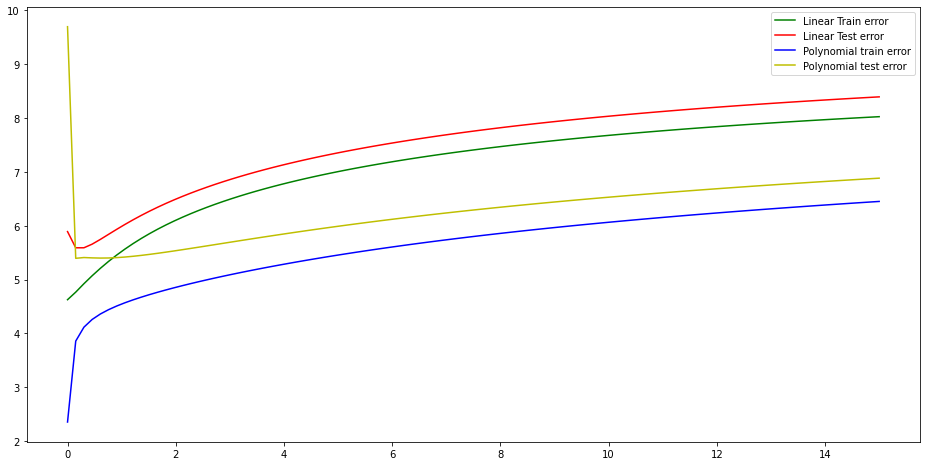

In [139]:
from sklearn.linear_model import Ridge, Lasso
from numpy import linspace
import numpy as  np
import matplotlib.pyplot as plt

alphas = linspace(0,15,100)
errors_tr=[]
errors_ts=[]
errors_tr_p=[]
errors_ts_p=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, normalize=True)
    cv_dict =cross_validate(ridge, X, y, return_train_score=True, cv=10, scoring="neg_mean_squared_error") 
    cvp_dict = cross_validate(ridge, X_poly, y, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
    tr,ts=[cv_dict.get(key) for key in ["train_score", "test_score"]]
    trp,tsp=[cvp_dict.get(key) for key in ["train_score", "test_score"]]
    errors_tr.append((-np.mean(tr))**0.5)
    errors_ts.append((-np.mean(ts))**0.5)
    errors_tr_p.append((-np.mean(trp))**0.5)
    errors_ts_p.append((-np.mean(tsp))**0.5)

plt.figure(figsize=(16,8))
plt.plot(alphas, errors_tr, c="g", label="Linear Train error")
plt.plot(alphas, errors_ts, c="r", label="Linear Test error")
plt.plot(alphas, errors_tr_p, c="b", label="Polynomial train error")
plt.plot(alphas, errors_ts_p, c="y", label="Polynomial test error")
plt.legend()
plt.show()

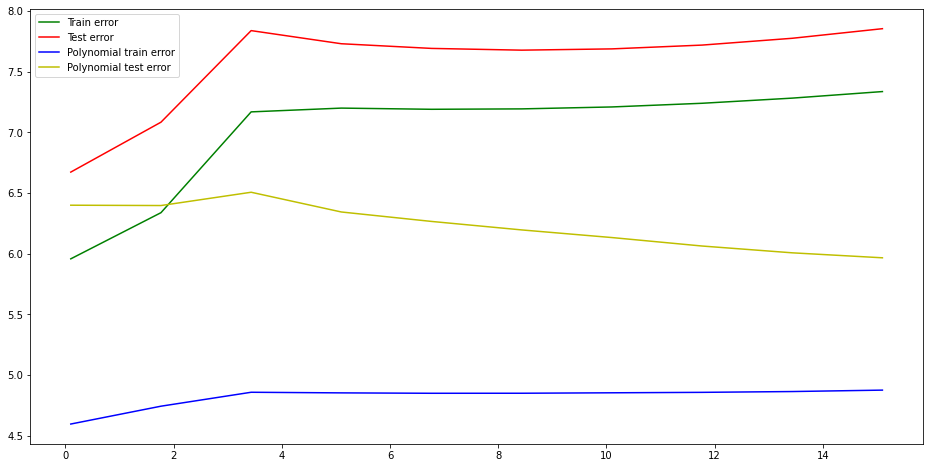

In [133]:
alphas = linspace(0.1,15.1,10)
errors_tr=[]
errors_ts=[]
errors_tr_p=[]
errors_ts_p=[]

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=5000, tol=5)
    cv_dict = cross_validate(lasso, X, y, return_train_score=True, cv=10, scoring="neg_mean_squared_error") 
    cvp_dict = cross_validate(lasso, X_poly, y, cv=10, return_train_score=True, scoring="neg_mean_squared_error")
    tr,ts=[cv_dict.get(key) for key in ["train_score", "test_score"]]
    trp,tsp=[cvp_dict.get(key) for key in ["train_score", "test_score"]]
    errors_tr.append((-np.mean(tr))**0.5)
    errors_ts.append((-np.mean(ts))**0.5)
    errors_tr_p.append((-np.mean(trp))**0.5)
    errors_ts_p.append((-np.mean(tsp))**0.5)
    
plt.figure(figsize=(16,8))
plt.plot(alphas, errors_tr, c="g", label="Train error")
plt.plot(alphas, errors_ts, c="r", label="Test error")
plt.plot(alphas, errors_tr_p, c="b", label="Polynomial train error")
plt.plot(alphas, errors_ts_p, c="y", label="Polynomial test error")
plt.legend()
plt.show()

- *For the Lasso regression, we can see that the error converges after a certain alpha, but for the Ridge it increases.*

In [135]:
lasso = Lasso(max_iter=5000)
lasso.fit(X_train, y_train)
print("Lasso coefficients", lasso.coef_, sep= "\n")

ridge = Ridge(max_iter=5000)
ridge.fit(X_train, y_train)
print("Ridge coefficients", ridge.coef_, sep= "\n")

Lasso coefficients
[-0.08217966  0.05337436 -0.0164313   0.         -0.          1.00072407
  0.01583433 -0.78924134  0.30529662 -0.01654608 -0.64311142  0.00834855
 -0.75180898]
Ridge coefficients
[-1.20608251e-01  4.72119700e-02 -7.87577597e-02  3.98991650e+00
 -1.04462830e+01  3.71364176e+00 -1.03386588e-02 -1.51138168e+00
  3.07105097e-01 -1.19950062e-02 -7.42393075e-01  9.57450777e-03
 -5.37583941e-01]


- *Ridge seems to have included more coefficients than the Lasso regression.*

## Question 3 (30 points) Cancer detection

Given a dataset with features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, which describes characteristics of the cell nuclei present in the image, let's try to predict whether the patients are diagnosed as Malignant (M) or Benign (B).

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()

#### Question 3.1 (10 points) 
Use logistic regression to train the dataset through cross-validation, report the score on train and test set, respectively. Explain what do you find.

In [146]:
x, Y = load_breast_cancer(return_X_y=True)
modelLR = LogisticRegression(max_iter=5000)

cv_L = cross_validate(modelLR, x, Y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
tr,ts=[cv_L.get(key) for key in ["train_score", "test_score"]]
print("Train errors",tr)
print("Test errors",ts)
print("Mean train error for logistic model: ", np.mean(tr),", Variance of train error: ", np.std(tr))
print("Mean test error for logistic model: ", np.mean(ts),", Variance of test error: ", np.std(ts))

Train errors [-0.04492188 -0.03515625 -0.04296875 -0.0390625  -0.04101562 -0.04492188
 -0.03710938 -0.03515625 -0.04101562 -0.03898635]
Test errors [-0.01754386 -0.0877193  -0.07017544 -0.05263158 -0.01754386 -0.01754386
 -0.07017544 -0.05263158 -0.03508772 -0.03571429]
Mean train error for logistic model:  -0.040031447977582846 , Variance of train error:  0.003413241949059138
Mean test error for logistic model:  -0.0456766917293233 , Variance of test error:  0.02377066146439998


- Same reasoning as in question 2, the test error is slightly higher.

#### Question 3.2 (10 points) 
By default, sklearn's logistic regression uses the L2 regularization. Now use the logistic regression without any regularzation to perform cross validation, report what do you find on train and test set.

In [145]:
modelLR = LogisticRegression(max_iter=5000, penalty = 'none', solver="sag")
cv_L = cross_validate(modelLR, x, Y, scoring="neg_mean_squared_error", cv=10, return_train_score=True)
tr,ts=[cv_L.get(key) for key in ["train_score", "test_score"]]
print("Train errors",tr)
print("Test errors",ts)
print("Mean train error for logistic model: ", np.mean(tr),", Variance of train error: ", np.std(tr))
print("Mean test error for logistic model: ", np.mean(ts),", Variance of test error: ", np.std(ts))

Train errors [-0.07617188 -0.07226562 -0.07421875 -0.08007812 -0.078125   -0.07226562
 -0.078125   -0.078125   -0.07226562 -0.07602339]
Test errors [-0.0877193  -0.0877193  -0.10526316 -0.05263158 -0.07017544 -0.12280702
 -0.01754386 -0.07017544 -0.10526316 -0.05357143]
Mean train error for logistic model:  -0.07576640168128654 , Variance of train error:  0.002732616080745274
Mean test error for logistic model:  -0.07728696741854636 , Variance of test error:  0.029488604675872058


- *Train set error is lower again than test. Though the errors have increased when excluding the regularization.*

#### Question 3.3 (10 points) 
Check how many Benign and Malignant cases in the dataset. What might be the problem if we use the default score of the logistic regression cross-validation? Now adjust the class weight of M and L and retrain the model again to bias toward Malignant, using the relative weight of M and L as 2:1. What about the relaive weight to be 5:1, or 10:1? Explain what you find.

Hint: you can use LogisticRegressionCV to combine LogisticRegression and cross-validation. 

In [153]:
from sklearn.linear_model import LogisticRegressionCV
x, Y = load_breast_cancer(return_X_y=True)
df = load_breast_cancer(as_frame=True)
print("M: ",df["target"].value_counts()[0])
print("B: ",df["target"].value_counts()[1])

M:  212
B:  357


In [154]:
from sklearn.metrics import classification_report

weight2to1 = {0:1, 1:2}
weight5to1 = {0:1, 1:5}
weight10to1 = {0:1, 1:10}

In [158]:
model = LogisticRegressionCV(cv=10, class_weight = weight2to1, solver="saga", max_iter=5000).fit(x, Y)
predLRCV = model.predict(x)
print(classification_report(Y, predLRCV, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.82      0.89       212
      benign       0.90      0.99      0.94       357

    accuracy                           0.92       569
   macro avg       0.94      0.90      0.92       569
weighted avg       0.93      0.92      0.92       569



In [159]:
model = LogisticRegressionCV(cv=10, class_weight = weight5to1, solver="saga", max_iter=5000).fit(x, Y)
predLRCV = model.predict(x)
print(classification_report(Y, predLRCV, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.99      0.78      0.87       212
      benign       0.88      0.99      0.94       357

    accuracy                           0.91       569
   macro avg       0.94      0.89      0.90       569
weighted avg       0.92      0.91      0.91       569



In [160]:
model = LogisticRegressionCV(cv=10, class_weight = weight10to1, solver="saga", max_iter=5000).fit(x, Y)
predLRCV = model.predict(x)
print(classification_report(Y, predLRCV, target_names = data.target_names))

              precision    recall  f1-score   support

   malignant       0.99      0.74      0.84       212
      benign       0.86      0.99      0.92       357

    accuracy                           0.90       569
   macro avg       0.93      0.87      0.88       569
weighted avg       0.91      0.90      0.89       569



- We can see that the recall and F1 score scores of malignant drop when biasing the model.
- We also observe that the precision and the F1 score of benign drops.
- Biasing this model lower a lot the accuracy of the classification and also the recall.